# Import 

In [44]:
import pandas as pd
import tensorflow
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, TimeDistributed, Dense,Dropout,Activation,Conv2D,Reshape
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.utils import *
import math
import time
import matplotlib.pyplot as plt

# Read Date

In [45]:
df = pd.read_csv('data/2377.csv' , encoding='big5')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 22 columns):
時間             841 non-null object
Open           841 non-null float64
High           841 non-null float64
Low            841 non-null float64
Close          841 non-null float64
SMA5           841 non-null float64
SMA10          841 non-null float64
SMA20          841 non-null float64
SMA60          841 non-null float64
Vol            841 non-null float64
MA5            841 non-null float64
MA10           841 non-null float64
DIF            841 non-null float64
MACD9          841 non-null float64
OSC            841 non-null float64
K              841 non-null object
D              841 non-null object
RSIx6          841 non-null object
RSIx12         841 non-null object
BBand width    841 non-null object
Band%EMA3      841 non-null object
TaiwanAll      841 non-null float64
dtypes: float64(15), object(7)
memory usage: 145.8+ KB


In [47]:
df['K'] = df['K'].str.replace('%','').astype('float')
df['D'] = df['D'].str.replace('%','').astype('float')
    

In [48]:
# plt.figure(figsize = (15,5))
# plt.plot(df2.Close.values , color='red' , label='Close')
# plt.plot(df2.MACD9.values , color='blue' , label='MACD9')
# plt.plot(df2.SMA5.values , color='green' , label= 'SMA5')
# plt.plot(df2.SMA10.values , color='black' , label='SMA10')
# plt.plot(df2.K.values , color='yellow' , label='K')
# plt.plot(df2.D.values , color='grey' , label='D')

# plt.title('2330')
# plt.xlabel('Days')
# plt.ylabel('price')
# plt.legend(loc='best')
# plt.show()

C:\Users\leobo\Anaconda3\envs\tensorflow-gpu\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


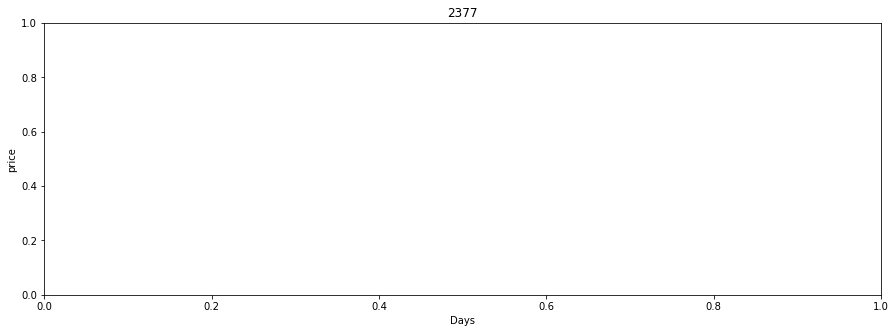

In [49]:
plt.figure(figsize = (15,5))


plt.title('2377')
plt.xlabel('Days')
plt.ylabel('price')
plt.legend(loc='best')
plt.show()

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 22 columns):
時間             841 non-null object
Open           841 non-null float64
High           841 non-null float64
Low            841 non-null float64
Close          841 non-null float64
SMA5           841 non-null float64
SMA10          841 non-null float64
SMA20          841 non-null float64
SMA60          841 non-null float64
Vol            841 non-null float64
MA5            841 non-null float64
MA10           841 non-null float64
DIF            841 non-null float64
MACD9          841 non-null float64
OSC            841 non-null float64
K              841 non-null float64
D              841 non-null float64
RSIx6          841 non-null object
RSIx12         841 non-null object
BBand width    841 non-null object
Band%EMA3      841 non-null object
TaiwanAll      841 non-null float64
dtypes: float64(17), object(5)
memory usage: 145.8+ KB


In [101]:
df = pd.read_csv('data/2377.csv' , encoding='big5')

In [104]:
df.tail(10)

,時間,Open,High,Low,Close,SMA5,SMA10,SMA20,SMA60,Vol,...,DIF,MACD9,OSC,K,D,RSIx6,RSIx12,BBand width,Band%EMA3,TaiwanAll
838,2018/4/13,102.0,104.0,100.5,100.5,99.88,99.09,96.09,91.88,6485.0,...,2.92,2.60,0.32,59.25%,61.15%,63.88%,62.22%,17.40%,17.76%,10965.39
839,2018/4/16,101.5,101.5,95.6,95.8,99.18,98.90,96.34,92.01,8117.0,...,2.58,2.60,-0.02,42.31%,54.87%,36.91%,49.20%,16.62%,17.19%,10954.55
840,2018/4/17,95.8,96.0,90.9,95.0,98.46,98.84,96.56,92.17,10014.0,...,2.05,2.49,-0.44,38.25%,49.33%,33.98%,47.36%,15.69%,16.44%,10810.45
841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
def batch_data( time_steps,sd,batch_size,feature_list):

    df = pd.read_csv('data/2377.csv' , encoding='big5')
#     print(df.shape)
#     df=df[:-7]
#     print(df.shape)
    df['RSI6'] = df['RSIx6'].str.replace('%','').astype('float') 
    df['RSI6'] = df['RSI6'] * 0.01
    df['RSI12'] = df['RSIx12'].str.replace('%','').astype('float') 
    df['RSI12'] = df['RSI12'] * 0.01
    
    
#     del df['Date']
#     del df['DIF']
#     del df['K']
#     del df['D']
#     del df['MACD9']
#     del df['OSC']
#     del df['SMA60']
#     del df['MA10']
#     del df['MA5']
#     del df['SMA20']
#     del df['SMA10']

    #_data = df.drop(['Date'],['DIF'],['K'],['D'],['MACD9'],['OSC'], axis=1)
    #df.drop(['Date'],axis=1)
    # df.drop(['DIF'],axis=1)
    # df.drop(['K'],axis=1)
    # df.drop(['D'],axis=1)
    # df.drop(['MACD9'],axis=1)
    # df.drop(['OSC'],axis=1)
    df['K'] = df['K'].str.replace('%','').astype('float')
    df['K'] = df['K'] * 0.01
    
    df['D'] = df['D'].str.replace('%','').astype('float')
    df['D'] = df['D'] * 0.01

    df['Vol']= df['Vol'].astype('float')
    df['Open'] = df['Open'].astype('float')
    df['High'] = df['High'].astype('float')
    df['Low'] = df['Low'].astype('float')
    df['Close'] = df['Close'].astype('float')
    df['SMA5'] = df['SMA5'].astype('float')
    df['SMA10'] = df['SMA10'].astype('float')
    df['SMA20'] = df['SMA20'].astype('float')
    df['SMA60'] = df['SMA60'].astype('float')
    df['MA5'] = df['MA5'].astype('float')
    df['MA10'] = df['MA10'].astype('float')
    
    
#     sd = -1

    df['label']=(df['Close'].shift(sd)-df['Close']>=0).astype('int')


    Y =df['label']
    Y = np_utils.to_categorical(Y)
    #first time train
    #X = df[['Vol','Open','High','Low','Close']]
    # acc 65
    
    #second
    #X = df[['Vol','Open','High','Low','Close','MA5']]
    
    #third
    #X = df[['Vol','Open','High','Low','Close','MA5','MA10']]
    
    #4
    X = df[feature_list]
    #X = df[['Vol','Open','High','Low','Close','MA5','MA10','SMA5','SMA10','SMA20']]
    

    Y = np.array(Y)
    X = np.array(X)
    
    m = MinMaxScaler(feature_range=(0,1))
    X=m.fit_transform(X)

    X_t = []
    Y_t = []
    
    
    
    
    for i in range(0, X.shape[0] - time_steps):
        

        X_t.append(X[i:i+time_steps])
        Y_t.append(Y[i+time_steps])
    X_t = np.array(X_t)
    Y_t = np.array(Y_t)
    
    dn = X_t.shape[0]%batch_size
    X_t = X_t[dn:]
    Y_t = Y_t[dn:]
    
    
      
#     X_t,Y_t=shuffle(X_t, Y_t, random_state=0)
    
    X_t_batch_train=X_t[:-batch_size]
    Y_t_batch_train=Y_t[:-batch_size]

    X_t_batch_test=X_t[-batch_size:]
    Y_t_batch_test=Y_t[-batch_size:]
    return X_t_batch_train,Y_t_batch_train,X_t_batch_test,Y_t_batch_test,df
    
    

In [173]:
df.head()

,時間,Open,High,Low,Close,SMA5,SMA10,SMA20,SMA60,Vol,...,K,D,RSIx6,RSIx12,BBand width,Band%EMA3,TaiwanAll,RSI6,RSI12,label
0,2014/11/7,38.20,38.85,37.90,38.80,38.57,37.58,37.10,39.34,4445.0,...,0.6431,0.6171,63.34%,56.23%,10.95%,10.81%,8912.62,0.6334,0.5623,0
1,2014/11/10,39.15,39.45,38.65,38.65,38.50,37.89,37.25,39.29,3664.0,...,0.6420,0.6254,60.79%,55.18%,10.82%,10.81%,9049.98,0.6079,0.5518,1
2,2014/11/11,38.65,39.00,38.40,38.70,38.44,38.15,37.34,39.24,2320.0,...,0.6300,0.6270,61.41%,55.48%,11.28%,11.05%,9034.14,0.6141,0.5548,0
3,2014/11/12,38.60,38.80,37.65,37.70,38.33,38.19,37.41,39.16,4939.0,...,0.4978,0.5839,44.53%,48.39%,10.93%,10.99%,8918.95,0.4453,0.4839,0
4,2014/11/13,37.00,37.40,35.65,36.30,38.03,38.14,37.42,39.04,11496.0,...,0.3817,0.5165,30.46%,40.49%,10.87%,10.93%,8980.67,0.3046,0.4049,1


In [174]:
df.shape

(841, 25)

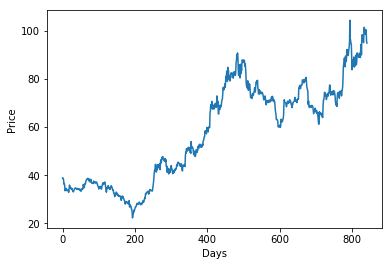

In [175]:
#dates = pd.to_datetime(df['Date'] , format='%Y%m%d')
plt.plot(df['Close'])
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

In [188]:
batch_size= 128
LR= 0.005
epoch= 1000
input_size= 6
time_steps= 6
sd = -3

In [191]:
# feature_list_try = ['SMA5', 'SMA10', 'SMA20',
#        'SMA60', 'MA5', 'MA10', 'DIF', 'MACD9', 'OSC', 'K', 'D','S_P500','SOXX','ADR']
# feature_list_try = ['S_P500','SOXX','ADR','RSI6','RSI12']
# feature_list_try = ['RSI6','TaiwanAll','RSI12','SMA5','MA5']
feature_list_try = ['TaiwanAll','RSI6','RSI12','SMA5','MA5']

new feature:  TaiwanAll


C:\Users\leobo\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, units=256, stateful=False, batch_input_shape=(128, 6, 6...)`
  if sys.path[0] == '':
C:\Users\leobo\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=False, units=128, stateful=False)`


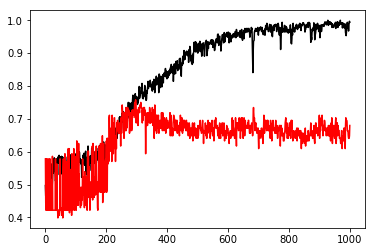

640/640 [==============================] - 0s 69us/step
train_score: [0.013770237809967511, 0.9953125]
128/128 [==============================] - 0s 109us/step
test_score: [4.396167755126953, 0.6796875]
new feature:  RSI6


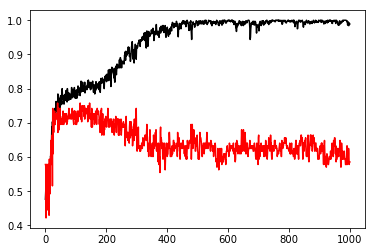

640/640 [==============================] - 0s 84us/step
train_score: [0.037256391887785865, 0.99375]
128/128 [==============================] - 0s 78us/step
test_score: [4.850805759429932, 0.5859375]
new feature:  RSI12


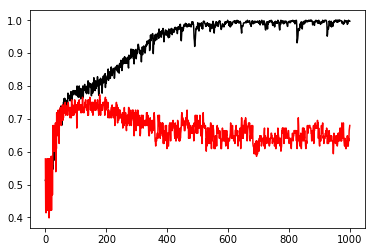

640/640 [==============================] - 0s 70us/step
train_score: [0.002650309769978776, 0.9984375]
128/128 [==============================] - 0s 94us/step
test_score: [4.037904739379883, 0.6796875]
new feature:  SMA5


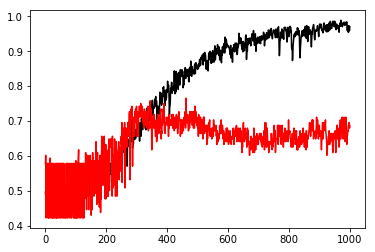

640/640 [==============================] - 0s 70us/step
train_score: [0.046952591836452486, 0.98125]
128/128 [==============================] - 0s 94us/step
test_score: [2.3217380046844482, 0.6875]
new feature:  MA5


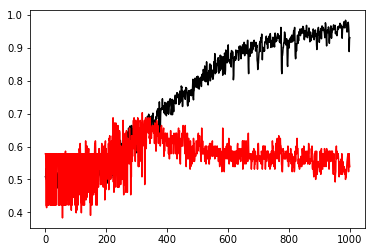

640/640 [==============================] - 0s 78us/step
train_score: [0.11685390025377274, 0.940625]
128/128 [==============================] - 0s 86us/step
test_score: [4.152405738830566, 0.5390625]


In [192]:

for i in range(len(feature_list_try)):
    feature_list = ['Open', 'High', 'Low', 'Close','Vol']
    feature_list.append(feature_list_try[i])
    input_size = len(feature_list)
    print('new feature: ',feature_list_try[i])
    model =Sequential()
    model.add(LSTM(
                batch_input_shape=(batch_size,time_steps,input_size),
                output_dim=256,
                return_sequences=True,
                stateful=False,
            ))
    model.add(Dropout(0.6))
    model.add(LSTM(
            output_dim=128,
                return_sequences=False,
                stateful=False,
             ))
    model.add(Dropout(0.6))
    model.add(Dense(256))
    model.add(Dropout(0.4))
    model.add(Dense(128))
    model.add(Dropout(0.4))
    model.add(Dense(64))
    model.add(Dropout(0.4))
    model.add(Dense(2,activation='softmax'))
    adam = Adam(LR)
    #     model.summary()
    model.compile(optimizer=adam,
                      loss='categorical_crossentropy',metrics=['accuracy'])
    X_t_batch_train,Y_t_batch_train,X_t_batch_test,Y_t_batch_test,df=batch_data(time_steps,-sd,batch_size,feature_list)
    train_history=model.fit(X_t_batch_train, Y_t_batch_train, epochs=epoch, batch_size=batch_size,verbose=0,validation_data=(X_t_batch_test,Y_t_batch_test),shuffle=True)
    plt.plot(train_history.history['acc'],color='black')
    plt.plot(train_history.history['val_acc'],color='red')
    plt.show()

    score = model.evaluate(X_t_batch_train,Y_t_batch_train, verbose=1,batch_size=128)
    print('train_score:', score)
    score = model.evaluate(X_t_batch_test,Y_t_batch_test, verbose=1,batch_size=128)
    print('test_score:', score)

In [ ]:
df.info()

In [139]:
df.tail

<bound method NDFrame.tail of              時間    Open    High     Low   Close    SMA5  SMA10  SMA20  SMA60  \
0     2014/11/7   38.20   38.85   37.90   38.80   38.57  37.58  37.10  39.34   
1    2014/11/10   39.15   39.45   38.65   38.65   38.50  37.89  37.25  39.29   
2    2014/11/11   38.65   39.00   38.40   38.70   38.44  38.15  37.34  39.24   
3    2014/11/12   38.60   38.80   37.65   37.70   38.33  38.19  37.41  39.16   
4    2014/11/13   37.00   37.40   35.65   36.30   38.03  38.14  37.42  39.04   
5    2014/11/14   36.30   36.70   35.80   36.50   37.57  38.07  37.40  38.94   
6    2014/11/17   36.50   36.50   35.50   35.50   36.94  37.72  37.30  38.86   
7    2014/11/18   35.50   35.75   33.20   33.50   35.90  37.17  37.14  38.73   
8    2014/11/19   33.50   34.50   33.50   33.95   35.15  36.74  36.98  38.60   
9    2014/11/20   34.05   34.45   34.00   34.00   34.69  36.36  36.84  38.46   
10   2014/11/21   34.10   34.80   34.10   34.50   34.29  35.93  36.75  38.34   
11   2014/